## Part 1
- Overview
- Demo
- Model overview
- Preloaded model & tokenizer
- Quick test

## Part 2
- Update model
- Load dataset
- Data formatting loader

## Part 3
- Training
- Testing
- Recreate demo

In [3]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.tam_Taml"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "taml": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.9, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Create a DatasetDict
dataset_dict3 = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict3)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 18862
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1048
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1048
    })
})


In [4]:
dataset_dict3['train'][9]

{'translation': {'en': 'The Sikhs, being outnumbered, withdrew to Rahon and captured its fort after defeating the Mughals in the battle of Rahon on 12 October 1710.',
  'taml': 'சீக்கியர்கள் எண்ணிக்கையில் குறைவாக இருந்ததால் ராகோனுக்குப் பின்வாங்கி, 1710 அக்டோபர் 12 அன்று ராகோன் போரில் முகலாயர்களைத் தோற்கடித்து அதன் கோட்டையைக் கைப்பற்றினர்.'}}

In [6]:
from datasets import DatasetDict

new_train_dataset = dataset_dict3['train'].select(range(18861))
new_validation_dataset = dataset_dict3['validation'].select(range(1000))
new_test_dataset = dataset_dict3['test'].select(range(1000))

new_dataset_dict = DatasetDict({
    'train': new_train_dataset,
    'validation': new_validation_dataset,
    'test': new_test_dataset
})
print(new_dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 18861
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
})


In [5]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.mal_Mlym"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "ml": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.8, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Create a DatasetDict
dataset_dict2 = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict2)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 33297
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 4162
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 4162
    })
})


In [6]:
dataset_dict2['train'][9]

{'translation': {'en': 'Punjab has 23 districts, which are geographically classified into Majha, Malwa, Doaba and Puadh regions, as under.',
  'ml': 'ഭൂമിശാസ്ത്രപരമായി മജ, മാൽവ, ദോവാബ, പുവാദ് മേഖലകളായി തിരിച്ചിരിക്കുന്ന 23 ജില്ലകളാണ് പഞ്ചാബിൽ ഉള്ളത്.'}}

In [7]:
from datasets import Dataset, DatasetDict
import pandas as pd

# Read the files
file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-tam_Taml/train.tam_Taml"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    en_sentences = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    ml_sentences = f.readlines()

# Ensure both files have the same number of sentences
assert len(en_sentences) == len(ml_sentences), "The files have a different number of sentences."

# Create a DataFrame
data = {
    "translation": [{"en": en.strip(), "taml": ml.strip()} for en, ml in zip(en_sentences, ml_sentences)]
}
df = pd.DataFrame(data)

# Split the data into train, validation, and test sets
train_df = df.sample(frac=0.8, random_state=42)
remaining_df = df.drop(train_df.index)
valid_df = remaining_df.sample(frac=0.5, random_state=42)
test_df = remaining_df.drop(valid_df.index)

# Convert the DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
valid_dataset = Dataset.from_pandas(valid_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])


# Create a DatasetDict
dataset_dict = DatasetDict({
    "train": train_dataset,
    "validation": valid_dataset,
    "test": test_dataset
})

print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 16766
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 2096
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2096
    })
})


In [8]:
dataset_dict['train'][9]

{'translation': {'en': 'The Sikhs, being outnumbered, withdrew to Rahon and captured its fort after defeating the Mughals in the battle of Rahon on 12 October 1710.',
  'taml': 'சீக்கியர்கள் எண்ணிக்கையில் குறைவாக இருந்ததால் ராகோனுக்குப் பின்வாங்கி, 1710 அக்டோபர் 12 அன்று ராகோன் போரில் முகலாயர்களைத் தோற்கடித்து அதன் கோட்டையைக் கைப்பற்றினர்.'}}

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

file_eng_latn_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.eng_Latn"
file_mal_mlym = "/kaggle/input/wiki-datatrans/wiki/eng_Latn-mal_Mlym/train.mal_Mlym"

with open(file_eng_latn_mal_mlym, 'r', encoding='utf-8') as f:
    eng_data = f.readlines()

with open(file_mal_mlym, 'r', encoding='utf-8') as f:
    mal_data = f.readlines()

combined_data = [
    f"{eng.strip()} #ml#> {mal.strip()}"
    for eng, mal in zip(eng_data, mal_data)
]

df = pd.DataFrame(combined_data, columns=["translations"])

train_df = df.sample(frac=0.8, random_state=42)
temp_df = df.drop(train_df.index)
validation_df = temp_df.sample(frac=0.5, random_state=42)
test_df = temp_df.drop(validation_df.index)

# Step 4: Create Dataset objects and remove the '__index_level_0__' column
train_dataset = Dataset.from_pandas(train_df).remove_columns(['__index_level_0__'])
validation_dataset = Dataset.from_pandas(validation_df).remove_columns(['__index_level_0__'])
test_dataset = Dataset.from_pandas(test_df).remove_columns(['__index_level_0__'])

# Step 5: Create a DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})

print(dataset_dict)


In [ ]:
from datasets import DatasetDict

new_train_dataset = dataset_dict['train'].select(range(33000))
new_validation_dataset = dataset_dict['validation'].select(range(1000))
new_test_dataset = dataset_dict['test'].select(range(1000))

new_dataset_dict = DatasetDict({
    'train': new_train_dataset,
    'validation': new_validation_dataset,
    'test': new_test_dataset
})
print(new_dataset_dict)

# Download Modules

In [1]:
!pip install transformers sentencepiece datasets

In [2]:
from datasets import load_dataset
# from google.colab import drive
from IPython.display import display
# from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

In [13]:
max_seq_len = 20

In [3]:
model_repo = 'google/mt5-base'
model_path = '/content/gdrive/My Drive/mt5_translation.pt'
max_seq_len = 20

# Load Tokenizer & Model

In [4]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [5]:
# Model description: https://huggingface.co/google/mt5-base
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Overview and Quick Test

In [ ]:
token_ids = tokenizer.encode(
    '<jp> This will be translated to Japanese! (hopefully)',
    return_tensors='pt').cuda()
print(token_ids)

model_out = model.generate(token_ids)
print(model_out)

output_text = tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(model_out[0]))
print(output_text)

tensor([[  1042,   3889,    669,   1494,    898,    390,  37194,    285,    288,

          30865,    309,    274, 116024,  11994,    271,      1]],

       device='cuda:0')

tensor([[     0, 250099,    259,    264,    259, 228700,      1]],

       device='cuda:0')

<pad> <extra_id_0> - issuu</s>


# Steps
1. Load the pretrained model and tokenizer
2. Load dataset
3. Transform dataset into input (entails a minor model change)
4. Train/finetune the model on our dataset
5. Test the model

# Test Tokenizer

In [ ]:
example_input_str = '<jp> This is just a test nbuig.'
# example_input_str = 'これは普通のテスト'
input_ids = tokenizer.encode(example_input_str, return_tensors='pt')
print('Input IDs:', input_ids)

tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Tokens:', tokens)

Input IDs: tensor([[1042, 3889,  669, 1494,  339, 1627,  259,  262, 2978,  259,  272, 1982,

         1315,  260,    1]])

Tokens: ['▁<', 'jp', '>', '▁This', '▁is', '▁just', '▁', 'a', '▁test', '▁', 'n', 'bu', 'ig', '.', '</s>']


# Prepare Dataset

In [6]:
# Source: https://huggingface.co/datasets/alt
dataset = load_dataset('alt')

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [7]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
        num_rows: 18088
    })
    validation: Dataset({
        features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
        num_rows: 1019
    })
})

In [8]:
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

In [1]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'hi': '<hi>',
    'bg':'<bg>',
}

In [12]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250103, 768)

In [18]:
token_ids = tokenizer.encode(
    example_input_str, return_tensors='pt', padding='max_length',
    truncation=True, max_length=max_seq_len)
print(token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print(tokens)

NameError: name 'example_input_str' is not defined

In [2]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]

  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]

def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]

def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [14]:
# Testing `data_transform`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<hi> ▁Italy ▁have ▁de feat ed ▁Portugal ▁3 1-5 ▁in ▁Pool ▁C ▁of ▁the ▁2007 ▁ Rugby ▁World ▁Cup ▁at ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁2007 ▁में ▁फ़ ्रा ंस , ▁पे रिस ▁के ▁पार् क ▁डे स ▁ प्रि ंस ेस ▁में ▁हु ए ▁ र ग् बी ▁विश्व ▁कप ▁के ▁पू ल ▁C ▁में ▁ इट ली ▁ने ▁पुर् त गाल ▁को ▁3 1-5 ▁से ▁हर ाया । </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

# Train/Finetune BERT

In [ ]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [16]:
import os

# Define the path to check
directory_path = '/kaggle/working/Trans/'

# List the contents of the directory
print("Contents of the directory:", os.listdir(directory_path))

# Verify the exact path
model_path = os.path.join(directory_path, 'mt5_translation.pt')
print("Model path:", model_path)

# Load the model if the file exists
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
else:
    print("File not found at the specified path.")




Contents of the directory: []
Model path: /kaggle/working/Trans/mt5_translation.pt
File not found at the specified path.


In [15]:
import os
os.makedirs('/kaggle/working/Trans/', exist_ok=True)

In [17]:
# Constants
n_epochs = 15
batch_size = 16
print_freq = 50
checkpoint_freq = 1000
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [18]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [19]:
losses = []

In [3]:
def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)

In [21]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    # Calculate loss and update weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

    if (batch_idx + 1) % checkpoint_freq == 0:
      test_loss = eval_model(model, test_dataset)
      print('Saving model with test loss of {:.3f}'.format(test_loss))
      torch.save(model.state_dict(), model_path)

torch.save(model.state_dict(), model_path)

/tmp/ipykernel_34/3548894850.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 11.406 | lr: 0.00014792899408284024
Epoch: 1 | Step: 100 | Avg. loss: 5.212 | lr: 0.0002958579881656805
Epoch: 1 | Step: 150 | Avg. loss: 4.079 | lr: 0.0004437869822485207
Epoch: 1 | Step: 200 | Avg. loss: 3.563 | lr: 0.000499077161228864
Epoch: 1 | Step: 250 | Avg. loss: 3.320 | lr: 0.0004975887115979995
Epoch: 1 | Step: 300 | Avg. loss: 3.128 | lr: 0.000496100261967135
Epoch: 1 | Step: 350 | Avg. loss: 2.964 | lr: 0.0004946118123362706
Epoch: 1 | Step: 400 | Avg. loss: 2.878 | lr: 0.0004931233627054061
Epoch: 1 | Step: 450 | Avg. loss: 2.838 | lr: 0.0004916349130745416
Epoch: 1 | Step: 500 | Avg. loss: 2.783 | lr: 0.0004901464634436771
Epoch: 1 | Step: 550 | Avg. loss: 2.732 | lr: 0.0004886580138128127
Epoch: 1 | Step: 600 | Avg. loss: 2.665 | lr: 0.0004871695641819481
Epoch: 1 | Step: 650 | Avg. loss: 2.583 | lr: 0.0004856811145510836
Epoch: 1 | Step: 700 | Avg. loss: 2.576 | lr: 0.00048419266492021913
Epoch: 1 | Step: 750 | Avg. loss: 2.593 | lr: 0.

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 2.254 | lr: 0.0004698737794713027
Epoch: 2 | Step: 100 | Avg. loss: 2.232 | lr: 0.0004683853298404382
Epoch: 2 | Step: 150 | Avg. loss: 2.239 | lr: 0.0004668968802095737
Epoch: 2 | Step: 200 | Avg. loss: 2.269 | lr: 0.00046540843057870924
Epoch: 2 | Step: 250 | Avg. loss: 2.222 | lr: 0.00046391998094784474
Epoch: 2 | Step: 300 | Avg. loss: 2.123 | lr: 0.00046243153131698023
Epoch: 2 | Step: 350 | Avg. loss: 2.190 | lr: 0.0004609430816861158
Epoch: 2 | Step: 400 | Avg. loss: 2.136 | lr: 0.00045945463205525127
Epoch: 2 | Step: 450 | Avg. loss: 2.178 | lr: 0.00045796618242438677
Epoch: 2 | Step: 500 | Avg. loss: 2.231 | lr: 0.00045647773279352226
Epoch: 2 | Step: 550 | Avg. loss: 2.201 | lr: 0.0004549892831626578
Epoch: 2 | Step: 600 | Avg. loss: 2.181 | lr: 0.0004535008335317933
Epoch: 2 | Step: 650 | Avg. loss: 2.155 | lr: 0.0004520123839009288
Epoch: 2 | Step: 700 | Avg. loss: 2.169 | lr: 0.00045052393427006434
Epoch: 2 | Step: 750 | Avg. loss: 2.211 | 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 1.942 | lr: 0.0004362050488211479
Epoch: 3 | Step: 100 | Avg. loss: 1.998 | lr: 0.0004347165991902834
Epoch: 3 | Step: 150 | Avg. loss: 1.976 | lr: 0.0004332281495594189
Epoch: 3 | Step: 200 | Avg. loss: 1.951 | lr: 0.00043173969992855445
Epoch: 3 | Step: 250 | Avg. loss: 2.003 | lr: 0.0004302512502976899
Epoch: 3 | Step: 300 | Avg. loss: 1.990 | lr: 0.00042876280066682544
Epoch: 3 | Step: 350 | Avg. loss: 1.954 | lr: 0.00042727435103596094
Epoch: 3 | Step: 400 | Avg. loss: 1.935 | lr: 0.0004257859014050965
Epoch: 3 | Step: 450 | Avg. loss: 1.949 | lr: 0.000424297451774232
Epoch: 3 | Step: 500 | Avg. loss: 1.946 | lr: 0.00042280900214336747
Epoch: 3 | Step: 550 | Avg. loss: 1.970 | lr: 0.000421320552512503
Epoch: 3 | Step: 600 | Avg. loss: 1.987 | lr: 0.00041983210288163846
Epoch: 3 | Step: 650 | Avg. loss: 1.972 | lr: 0.000418343653250774
Epoch: 3 | Step: 700 | Avg. loss: 2.018 | lr: 0.00041685520361990955
Epoch: 3 | Step: 750 | Avg. loss: 2.021 | lr: 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 1.791 | lr: 0.00040253631817099313
Epoch: 4 | Step: 100 | Avg. loss: 1.768 | lr: 0.00040104786854012857
Epoch: 4 | Step: 150 | Avg. loss: 1.741 | lr: 0.0003995594189092641
Epoch: 4 | Step: 200 | Avg. loss: 1.790 | lr: 0.00039807096927839966
Epoch: 4 | Step: 250 | Avg. loss: 1.757 | lr: 0.0003965825196475351
Epoch: 4 | Step: 300 | Avg. loss: 1.809 | lr: 0.00039509407001667065
Epoch: 4 | Step: 350 | Avg. loss: 1.780 | lr: 0.00039360562038580615
Epoch: 4 | Step: 400 | Avg. loss: 1.808 | lr: 0.0003921171707549417
Epoch: 4 | Step: 450 | Avg. loss: 1.829 | lr: 0.00039062872112407713
Epoch: 4 | Step: 500 | Avg. loss: 1.772 | lr: 0.0003891402714932127
Epoch: 4 | Step: 550 | Avg. loss: 1.817 | lr: 0.00038765182186234823
Epoch: 4 | Step: 600 | Avg. loss: 1.785 | lr: 0.00038616337223148367
Epoch: 4 | Step: 650 | Avg. loss: 1.862 | lr: 0.0003846749226006192
Epoch: 4 | Step: 700 | Avg. loss: 1.849 | lr: 0.0003831864729697547
Epoch: 4 | Step: 750 | Avg. loss: 1.793 |

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 1.708 | lr: 0.00036886758752083834
Epoch: 5 | Step: 100 | Avg. loss: 1.656 | lr: 0.0003673791378899738
Epoch: 5 | Step: 150 | Avg. loss: 1.655 | lr: 0.00036589068825910933
Epoch: 5 | Step: 200 | Avg. loss: 1.650 | lr: 0.0003644022386282448
Epoch: 5 | Step: 250 | Avg. loss: 1.676 | lr: 0.0003629137889973803
Epoch: 5 | Step: 300 | Avg. loss: 1.652 | lr: 0.00036142533936651586
Epoch: 5 | Step: 350 | Avg. loss: 1.664 | lr: 0.00035993688973565136
Epoch: 5 | Step: 400 | Avg. loss: 1.663 | lr: 0.0003584484401047869
Epoch: 5 | Step: 450 | Avg. loss: 1.670 | lr: 0.00035695999047392234
Epoch: 5 | Step: 500 | Avg. loss: 1.698 | lr: 0.0003554715408430579
Epoch: 5 | Step: 550 | Avg. loss: 1.717 | lr: 0.0003539830912121934
Epoch: 5 | Step: 600 | Avg. loss: 1.691 | lr: 0.0003524946415813289
Epoch: 5 | Step: 650 | Avg. loss: 1.674 | lr: 0.00035100619195046443
Epoch: 5 | Step: 700 | Avg. loss: 1.755 | lr: 0.0003495177423195999
Epoch: 5 | Step: 750 | Avg. loss: 1.678 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 1.519 | lr: 0.0003351988568706835
Epoch: 6 | Step: 100 | Avg. loss: 1.549 | lr: 0.000333710407239819
Epoch: 6 | Step: 150 | Avg. loss: 1.516 | lr: 0.00033222195760895454
Epoch: 6 | Step: 200 | Avg. loss: 1.544 | lr: 0.00033073350797809003
Epoch: 6 | Step: 250 | Avg. loss: 1.596 | lr: 0.0003292450583472255
Epoch: 6 | Step: 300 | Avg. loss: 1.573 | lr: 0.000327756608716361
Epoch: 6 | Step: 350 | Avg. loss: 1.557 | lr: 0.00032626815908549657
Epoch: 6 | Step: 400 | Avg. loss: 1.573 | lr: 0.0003247797094546321
Epoch: 6 | Step: 450 | Avg. loss: 1.597 | lr: 0.00032329125982376755
Epoch: 6 | Step: 500 | Avg. loss: 1.515 | lr: 0.0003218028101929031
Epoch: 6 | Step: 550 | Avg. loss: 1.590 | lr: 0.0003203143605620386
Epoch: 6 | Step: 600 | Avg. loss: 1.545 | lr: 0.0003188259109311741
Epoch: 6 | Step: 650 | Avg. loss: 1.620 | lr: 0.0003173374613003096
Epoch: 6 | Step: 700 | Avg. loss: 1.555 | lr: 0.00031584901166944513
Epoch: 6 | Step: 750 | Avg. loss: 1.547 | lr: 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 1.403 | lr: 0.0003015301262205287
Epoch: 7 | Step: 100 | Avg. loss: 1.462 | lr: 0.0003000416765896642
Epoch: 7 | Step: 150 | Avg. loss: 1.452 | lr: 0.0002985532269587997
Epoch: 7 | Step: 200 | Avg. loss: 1.466 | lr: 0.00029706477732793524
Epoch: 7 | Step: 250 | Avg. loss: 1.419 | lr: 0.00029557632769707074
Epoch: 7 | Step: 300 | Avg. loss: 1.470 | lr: 0.00029408787806620623
Epoch: 7 | Step: 350 | Avg. loss: 1.452 | lr: 0.0002925994284353418
Epoch: 7 | Step: 400 | Avg. loss: 1.445 | lr: 0.00029111097880447727
Epoch: 7 | Step: 450 | Avg. loss: 1.478 | lr: 0.00028962252917361277
Epoch: 7 | Step: 500 | Avg. loss: 1.443 | lr: 0.00028813407954274826
Epoch: 7 | Step: 550 | Avg. loss: 1.423 | lr: 0.0002866456299118838
Epoch: 7 | Step: 600 | Avg. loss: 1.422 | lr: 0.0002851571802810193
Epoch: 7 | Step: 650 | Avg. loss: 1.462 | lr: 0.0002836687306501548
Epoch: 7 | Step: 700 | Avg. loss: 1.450 | lr: 0.00028218028101929034
Epoch: 7 | Step: 750 | Avg. loss: 1.466 | 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 1.387 | lr: 0.0002678613955703739
Epoch: 8 | Step: 100 | Avg. loss: 1.383 | lr: 0.0002663729459395094
Epoch: 8 | Step: 150 | Avg. loss: 1.496 | lr: 0.0002648844963086449
Epoch: 8 | Step: 200 | Avg. loss: 1.615 | lr: 0.00026339604667778045
Epoch: 8 | Step: 250 | Avg. loss: 2.088 | lr: 0.0002619075970469159
Epoch: 8 | Step: 300 | Avg. loss: 2.390 | lr: 0.00026041914741605144
Epoch: 8 | Step: 350 | Avg. loss: 1.843 | lr: 0.000258930697785187
Epoch: 8 | Step: 400 | Avg. loss: 1.651 | lr: 0.0002574422481543225
Epoch: 8 | Step: 450 | Avg. loss: 1.712 | lr: 0.000255953798523458
Epoch: 8 | Step: 500 | Avg. loss: 1.658 | lr: 0.00025446534889259347
Epoch: 8 | Step: 550 | Avg. loss: 1.642 | lr: 0.000252976899261729
Epoch: 8 | Step: 600 | Avg. loss: 1.573 | lr: 0.00025148844963086446
Epoch: 8 | Step: 650 | Avg. loss: 1.488 | lr: 0.00025
Epoch: 8 | Step: 700 | Avg. loss: 1.521 | lr: 0.0002485115503691355
Epoch: 8 | Step: 750 | Avg. loss: 1.483 | lr: 0.00024702310073

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 9 | Step: 50 | Avg. loss: 1.305 | lr: 0.0002341926649202191
Epoch: 9 | Step: 100 | Avg. loss: 1.305 | lr: 0.00023270421528935462
Epoch: 9 | Step: 150 | Avg. loss: 1.286 | lr: 0.00023121576565849012
Epoch: 9 | Step: 200 | Avg. loss: 1.304 | lr: 0.00022972731602762564
Epoch: 9 | Step: 250 | Avg. loss: 1.377 | lr: 0.00022823886639676113
Epoch: 9 | Step: 300 | Avg. loss: 1.298 | lr: 0.00022675041676589665
Epoch: 9 | Step: 350 | Avg. loss: 1.300 | lr: 0.00022526196713503217
Epoch: 9 | Step: 400 | Avg. loss: 1.300 | lr: 0.00022377351750416767
Epoch: 9 | Step: 450 | Avg. loss: 1.266 | lr: 0.00022228506787330316
Epoch: 9 | Step: 500 | Avg. loss: 1.283 | lr: 0.00022079661824243868
Epoch: 9 | Step: 550 | Avg. loss: 1.306 | lr: 0.00021930816861157417
Epoch: 9 | Step: 600 | Avg. loss: 1.305 | lr: 0.0002178197189807097
Epoch: 9 | Step: 650 | Avg. loss: 1.327 | lr: 0.00021633126934984522
Epoch: 9 | Step: 700 | Avg. loss: 1.314 | lr: 0.0002148428197189807
Epoch: 9 | Step: 750 | Avg. loss: 1.35

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 10 | Step: 50 | Avg. loss: 1.140 | lr: 0.00020052393427006428
Epoch: 10 | Step: 100 | Avg. loss: 1.156 | lr: 0.00019903548463919983
Epoch: 10 | Step: 150 | Avg. loss: 1.119 | lr: 0.00019754703500833533
Epoch: 10 | Step: 200 | Avg. loss: 1.204 | lr: 0.00019605858537747085
Epoch: 10 | Step: 250 | Avg. loss: 1.142 | lr: 0.00019457013574660634
Epoch: 10 | Step: 300 | Avg. loss: 1.200 | lr: 0.00019308168611574183
Epoch: 10 | Step: 350 | Avg. loss: 1.189 | lr: 0.00019159323648487736
Epoch: 10 | Step: 400 | Avg. loss: 1.217 | lr: 0.00019010478685401285
Epoch: 10 | Step: 450 | Avg. loss: 1.140 | lr: 0.00018861633722314837
Epoch: 10 | Step: 500 | Avg. loss: 1.254 | lr: 0.0001871278875922839
Epoch: 10 | Step: 550 | Avg. loss: 1.190 | lr: 0.00018563943796141938
Epoch: 10 | Step: 600 | Avg. loss: 1.217 | lr: 0.0001841509883305549
Epoch: 10 | Step: 650 | Avg. loss: 1.158 | lr: 0.0001826625386996904
Epoch: 10 | Step: 700 | Avg. loss: 1.168 | lr: 0.0001811740890688259
Epoch: 10 | Step: 750 | A

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 11 | Step: 50 | Avg. loss: 1.089 | lr: 0.0001668552036199095
Epoch: 11 | Step: 100 | Avg. loss: 1.067 | lr: 0.00016536675398904502
Epoch: 11 | Step: 150 | Avg. loss: 1.057 | lr: 0.0001638783043581805
Epoch: 11 | Step: 200 | Avg. loss: 1.022 | lr: 0.00016238985472731606
Epoch: 11 | Step: 250 | Avg. loss: 1.105 | lr: 0.00016090140509645155
Epoch: 11 | Step: 300 | Avg. loss: 1.115 | lr: 0.00015941295546558705
Epoch: 11 | Step: 350 | Avg. loss: 1.070 | lr: 0.00015792450583472257
Epoch: 11 | Step: 400 | Avg. loss: 1.067 | lr: 0.00015643605620385806
Epoch: 11 | Step: 450 | Avg. loss: 1.078 | lr: 0.00015494760657299355
Epoch: 11 | Step: 500 | Avg. loss: 1.080 | lr: 0.00015345915694212907
Epoch: 11 | Step: 550 | Avg. loss: 1.057 | lr: 0.0001519707073112646
Epoch: 11 | Step: 600 | Avg. loss: 1.095 | lr: 0.00015048225768040012
Epoch: 11 | Step: 650 | Avg. loss: 1.091 | lr: 0.0001489938080495356
Epoch: 11 | Step: 700 | Avg. loss: 1.064 | lr: 0.0001475053584186711
Epoch: 11 | Step: 750 | Av

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 12 | Step: 50 | Avg. loss: 0.980 | lr: 0.0001331864729697547
Epoch: 12 | Step: 100 | Avg. loss: 0.959 | lr: 0.00013169802333889023
Epoch: 12 | Step: 150 | Avg. loss: 0.943 | lr: 0.00013020957370802572
Epoch: 12 | Step: 200 | Avg. loss: 0.959 | lr: 0.00012872112407716124
Epoch: 12 | Step: 250 | Avg. loss: 0.952 | lr: 0.00012723267444629673
Epoch: 12 | Step: 300 | Avg. loss: 0.951 | lr: 0.00012574422481543223
Epoch: 12 | Step: 350 | Avg. loss: 0.944 | lr: 0.00012425577518456775
Epoch: 12 | Step: 400 | Avg. loss: 0.952 | lr: 0.00012276732555370327
Epoch: 12 | Step: 450 | Avg. loss: 0.933 | lr: 0.00012127887592283878
Epoch: 12 | Step: 500 | Avg. loss: 0.951 | lr: 0.00011979042629197429
Epoch: 12 | Step: 550 | Avg. loss: 0.959 | lr: 0.00011830197666110978
Epoch: 12 | Step: 600 | Avg. loss: 0.948 | lr: 0.0001168135270302453
Epoch: 12 | Step: 650 | Avg. loss: 0.955 | lr: 0.00011532507739938081
Epoch: 12 | Step: 700 | Avg. loss: 0.960 | lr: 0.00011383662776851631
Epoch: 12 | Step: 750 |

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 13 | Step: 50 | Avg. loss: 0.873 | lr: 9.951774231959992e-05
Epoch: 13 | Step: 100 | Avg. loss: 0.845 | lr: 9.802929268873542e-05
Epoch: 13 | Step: 150 | Avg. loss: 0.824 | lr: 9.654084305787092e-05
Epoch: 13 | Step: 200 | Avg. loss: 0.891 | lr: 9.505239342700642e-05
Epoch: 13 | Step: 250 | Avg. loss: 0.884 | lr: 9.356394379614195e-05
Epoch: 13 | Step: 300 | Avg. loss: 0.856 | lr: 9.207549416527745e-05
Epoch: 13 | Step: 350 | Avg. loss: 0.818 | lr: 9.058704453441295e-05
Epoch: 13 | Step: 400 | Avg. loss: 0.845 | lr: 8.909859490354847e-05
Epoch: 13 | Step: 450 | Avg. loss: 0.817 | lr: 8.761014527268397e-05
Epoch: 13 | Step: 500 | Avg. loss: 0.838 | lr: 8.612169564181948e-05
Epoch: 13 | Step: 550 | Avg. loss: 0.863 | lr: 8.4633246010955e-05
Epoch: 13 | Step: 600 | Avg. loss: 0.860 | lr: 8.31447963800905e-05
Epoch: 13 | Step: 650 | Avg. loss: 0.822 | lr: 8.1656346749226e-05
Epoch: 13 | Step: 700 | Avg. loss: 0.868 | lr: 8.016789711836152e-05
Epoch: 13 | Step: 750 | Avg. loss: 0.849

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 14 | Step: 50 | Avg. loss: 0.745 | lr: 6.584901166944511e-05
Epoch: 14 | Step: 100 | Avg. loss: 0.751 | lr: 6.436056203858062e-05
Epoch: 14 | Step: 150 | Avg. loss: 0.753 | lr: 6.287211240771611e-05
Epoch: 14 | Step: 200 | Avg. loss: 0.718 | lr: 6.138366277685164e-05
Epoch: 14 | Step: 250 | Avg. loss: 0.756 | lr: 5.989521314598714e-05
Epoch: 14 | Step: 300 | Avg. loss: 0.765 | lr: 5.840676351512265e-05
Epoch: 14 | Step: 350 | Avg. loss: 0.780 | lr: 5.691831388425816e-05
Epoch: 14 | Step: 400 | Avg. loss: 0.748 | lr: 5.5429864253393664e-05
Epoch: 14 | Step: 450 | Avg. loss: 0.772 | lr: 5.394141462252918e-05
Epoch: 14 | Step: 500 | Avg. loss: 0.744 | lr: 5.245296499166468e-05
Epoch: 14 | Step: 550 | Avg. loss: 0.778 | lr: 5.096451536080019e-05
Epoch: 14 | Step: 600 | Avg. loss: 0.746 | lr: 4.94760657299357e-05
Epoch: 14 | Step: 650 | Avg. loss: 0.766 | lr: 4.798761609907121e-05
Epoch: 14 | Step: 700 | Avg. loss: 0.811 | lr: 4.649916646820672e-05
Epoch: 14 | Step: 750 | Avg. loss: 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 15 | Step: 50 | Avg. loss: 0.673 | lr: 3.218028101929031e-05
Epoch: 15 | Step: 100 | Avg. loss: 0.653 | lr: 3.069183138842582e-05
Epoch: 15 | Step: 150 | Avg. loss: 0.691 | lr: 2.9203381757561325e-05
Epoch: 15 | Step: 200 | Avg. loss: 0.696 | lr: 2.7714932126696832e-05
Epoch: 15 | Step: 250 | Avg. loss: 0.684 | lr: 2.622648249583234e-05
Epoch: 15 | Step: 300 | Avg. loss: 0.682 | lr: 2.473803286496785e-05
Epoch: 15 | Step: 350 | Avg. loss: 0.644 | lr: 2.324958323410336e-05
Epoch: 15 | Step: 400 | Avg. loss: 0.659 | lr: 2.1761133603238868e-05
Epoch: 15 | Step: 450 | Avg. loss: 0.670 | lr: 2.0272683972374376e-05
Epoch: 15 | Step: 500 | Avg. loss: 0.658 | lr: 1.8784234341509883e-05
Epoch: 15 | Step: 550 | Avg. loss: 0.655 | lr: 1.729578471064539e-05
Epoch: 15 | Step: 600 | Avg. loss: 0.698 | lr: 1.58073350797809e-05
Epoch: 15 | Step: 650 | Avg. loss: 0.658 | lr: 1.431888544891641e-05
Epoch: 15 | Step: 700 | Avg. loss: 0.719 | lr: 1.2830435818051917e-05
Epoch: 15 | Step: 750 | Avg. l

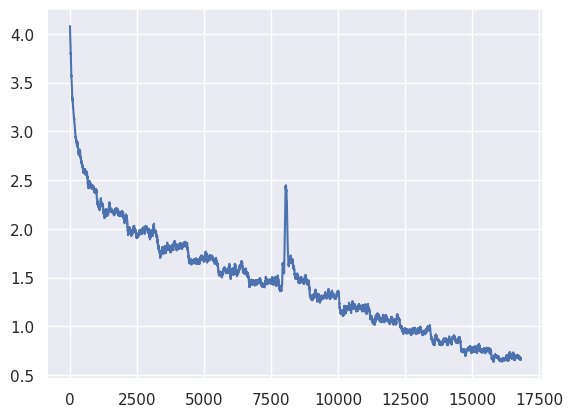

In [22]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [23]:
model.save_pretrained('./Trans2')
# Save the tokenizer
tokenizer.save_pretrained('./Trans2')

('./Trans2/tokenizer_config.json',
 './Trans2/special_tokens_map.json',
 './Trans2/spiece.model',
 './Trans2/added_tokens.json',
 './Trans2/tokenizer.json')

In [24]:
import shutil

shutil.make_archive('mt5modelFinal', 'zip', '/kaggle/working/Trans2')

'/kaggle/working/mt5modelFinal.zip'

In [25]:
from IPython.display import FileLink
FileLink(r'mt5modelFinal.zip')

/kaggle/working/mt5modelFinal.zip

# Manual Testing

In [6]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Define the paths to the model and tokenizer files
model_path = '/kaggle/input/mt5modelfinal-multilingual'
tokenizer_path = '/kaggle/input/mt5modelfinal-multilingual'

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

# Load the model
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
model = model.cuda()  # Move model to GPU if available

# Example usage of the loaded model
inputs = tokenizer("Translate this sentence.", return_tensors="pt")
inputs = {k: v.cuda() for k, v in inputs.items()}  # Move inputs to GPU if available
outputs = model.generate(**inputs)

decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Translated:", decoded_output)


You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Translated: এই পদক্ষেপটি মূলত ফরাসী ভাষায় উত্তর দেওয়া


In [50]:
test_sentence = dataset['validation'][0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'hi',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: "Though we are sad for his loss, he left a legacy that will inflame the enemy nation and religion."
Truncated input text: <hi> "Though we are sad for his loss, he left a legacy that will in</s>


In [51]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"हालांकि, हम उनकी मृत्यु के लिए दुखी हैं,
"हालांकि, हम उनकी मृत्यु के लिए हताश हैं
"हालांकि, हम उसके नुकसान के लिए दुखी हैं,


In [36]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'hi',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: It has been confirmed that eight thoroughbred race horses at Randwick Racecourse in Sydney have been infected with equine influenza.
Truncated input text: <hi> It has been confirmed that eight thoroughbred race horses at Randwick Racecourse</s>


In [37]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

यह पुष्टि हुई है कि रैंडविक रेस के दौरान आ
यह पुष्टि हुई है कि रैंडविक रेस के दौरान 
यह पुष्टि हो गई है कि रैंडविक रेस के दौरान


In [7]:
def translate(input_text, output_language, model, tokenizer, lang_token_map):
    input_ids = encode_input_str(
        text = input_text,
        target_lang = output_language,
        tokenizer = tokenizer,
        seq_len = model.config.max_length,
        lang_token_map = lang_token_map)
    input_ids = input_ids.unsqueeze(0).cuda()
    output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
    return tokenizer.decode(output_tokens[0], skip_special_tokens=True)

In [11]:
def translator(src_text, target_lang, model, tokenizer, lang_token_map):
    # Tokenize the input text
    input_ids = encode_input_str(src_text, target_lang, tokenizer, max_seq_len, lang_token_map).unsqueeze(0).cuda()

    # Generate translation using the model
    with torch.no_grad():
        outputs = model.generate(input_ids, max_length=max_seq_len)
    
    # Decode the output
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

In [16]:
import torch

In [24]:
input_text = 'He loves his parents.'
output_language = 'hi'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


उसे अपने माता-पिता की प्यास है।


In [23]:
input_text = 'वह अपने माता-पिता से प्यार करता है।'
output_language = 'bg'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি তার বাবার কাছে খুবই পছন্দ করেন।


In [22]:
input_text = 'He has bought a new car.'
output_language = 'bg'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি একটি নতুন গাড়ি কিনে কিনেছেন।


In [21]:
input_text = 'She sang a very beautiful song.'
output_language = 'bg'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি খুব সুন্দর একটি গান গেয়েছেন।


In [20]:
input_text = 'তুমি কেমন আছো?'
output_language = 'hi'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

तुम कौन हो?


In [18]:
input_text = 'यह किताब मुझे बहुत पसंद है।'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

This book is very suitable for me.


In [15]:
input_text = 'আমি আজকে বাসায় থাকব।'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

I will be at home today.


In [9]:
input_text = 'यह किताब मुझे बहुत पसंद है।'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

This book is very suitable for me.


In [8]:
input_text = 'आज मौसम बहुत अच्छा है।'
output_language = 'en'
print(translate(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

Today the weather was quite good, especially in New South Wales.


In [41]:
input_text = 'आज मौसम बहुत अच्छा है।'
output_language = 'en'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

Today the weather was quite good, especially in New South Wales.


In [42]:
input_text = 'यह किताब मुझे बहुत पसंद है।'
output_language = 'en'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

This book is very suitable for me.


In [57]:
input_text = "তুমি কেমন আছো?"
output_language = 'hi'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

तुम कौन हो?


In [58]:
input_text = "She sang a very beautiful song."
output_language = 'bg'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি একটি খুব সুন্দর সুই বাজানোর স্থানে ঢুকে


In [61]:
input_text = " He has bought a new car."
output_language = 'bg'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি একটি নতুন গাড়ি কিনে এবং তিনি একটি 


In [59]:
input_text = "वह अपने माता-पिता से प्यार करता है।"
output_language = 'bg'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

তিনি মাননীয় প্রধানমন্ত্রীকে ভাল করে ভাল করেন।


In [25]:
input_text = 'He loves his parents.'
output_language = 'hi'
print(translator(input_text, output_language, model, tokenizer, LANG_TOKEN_MAPPING))

उन्होंने अपने माता-पिता की प्यास की है।


In [26]:
!pip install evaluate sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.7 MB/s eta 0:00:00


In [27]:
import evaluate
import torch

import sacrebleu
import evaluate

# Load evaluation metrics
sacrebleu_metric = evaluate.load("sacrebleu")
chrf_metric = evaluate.load("chrf")
ter_metric = sacrebleu.metrics.TER()

# Define the postprocess_text function
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(decoded_preds, decoded_labels):
    # Post-process the decoded predictions and labels
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU score
    sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    bleu_score = sacrebleu_result['score']

    # Compute CHRF score
    chrf_result = chrf_metric.compute(predictions=decoded_preds, references=decoded_labels)
    chrf_score = chrf_result['score']

    # Compute TER score using sacrebleu
    ter_score = ter_metric.corpus_score(decoded_preds, [decoded_labels]).score

    # Create the result dictionary
    result = {
        'bleu': round(bleu_score, 4),
        'chrf': round(chrf_score, 4),
        'ter': round(ter_score, 4)
    }
   
    return result

2024-07-04 05:33:57.414648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 05:33:57.414749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 05:33:57.552206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [40]:
from nltk.translate.bleu_score import corpus_bleu

def bleu_score2(tgt_texts, trans_texts):
    bleu_dic = {}
    bleu_dic['1-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(1.0, 0, 0, 0))
    bleu_dic['1-2-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.5, 0.5, 0, 0))
    bleu_dic['1-3-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.3, 0.3, 0.3, 0))
    bleu_dic['1-4-grams'] = corpus_bleu(tgt_texts, trans_texts, weights=(0.25, 0.25, 0.25, 0.25))
    
    average_bleu = sum(bleu_dic.values()) / len(bleu_dic)
    bleu_dic['average'] = average_bleu
    
    return bleu_dic

In [29]:
from datasets import load_dataset, DatasetDict, Dataset

dataset = load_dataset('alt')

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [30]:

# Define a function to filter the translations
def filter_translations(example):
    return {
        'translation': {
            'en': example['translation']['en'],
            'hi': example['translation']['hi']
        }
    }

# Apply the filter function to each split of the dataset
new_dataset_dict = DatasetDict({
    'train': dataset['train'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'validation': dataset['validation'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'test': dataset['test'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
})

# Print the first example of the new train dataset to verify
print(new_dataset_dict['train'][0])


Map:   0%|          | 0/18088 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1019 [00:00<?, ? examples/s]

{'translation': {'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.', 'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।'}}


In [42]:

# Define a function to filter the translations
def filter_translations(example):
    return {
        'translation': {
            'hi': example['translation']['hi'],
            'bg': example['translation']['bg']
        }
    }

# Apply the filter function to each split of the dataset
new_dataset_dict3 = DatasetDict({
    'train': dataset['train'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'validation': dataset['validation'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'test': dataset['test'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
})

# Print the first example of the new train dataset to verify
print(new_dataset_dict3['train'][0])


Map:   0%|          | 0/18088 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1019 [00:00<?, ? examples/s]

{'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।', 'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।'}}


In [49]:

# Define a function to filter the translations
def filter_translations(example):
    return {
        'translation': {
            'hi': example['translation']['hi'],
            'en': example['translation']['en']
        }
    }

# Apply the filter function to each split of the dataset
new_dataset_dict4 = DatasetDict({
    'train': dataset['train'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'validation': dataset['validation'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'test': dataset['test'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
})

# Print the first example of the new train dataset to verify
print(new_dataset_dict4['train'][0])


{'translation': {'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.', 'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।'}}


In [56]:

# Define a function to filter the translations
def filter_translations(example):
    return {
        'translation': {
            'bg': example['translation']['bg'],
            'hi': example['translation']['hi']
        }
    }

# Apply the filter function to each split of the dataset
new_dataset_dict6 = DatasetDict({
    'train': dataset['train'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'validation': dataset['validation'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
    'test': dataset['test'].map(filter_translations, remove_columns=['SNT.URLID', 'SNT.URLID.SNTID', 'url']),
})

# Print the first example of the new train dataset to verify
print(new_dataset_dict6['train'][0])


Map:   0%|          | 0/18088 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1019 [00:00<?, ? examples/s]

{'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।', 'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।'}}


In [57]:
new_dataset_dict6

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 18088
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1019
    })
})

In [31]:
new_dataset_dict

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 18088
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1019
    })
})

In [58]:
val_data6 = new_dataset_dict6['validation']

In [32]:
val_data = new_dataset_dict['validation']

In [53]:
val_data[7]

{'SNT.URLID': '78103',
 'SNT.URLID.SNTID': '41',
 'url': 'http://en.wikinews.org/wiki/Horse_flu_infects_Australian_thoroughbreds',
 'translation': {'bg': 'Racing NSW-এর প্রধান নির্বাহী পিটার ভ্ল্যান্ডিস বলেছেন যে যেহেতু গত সপ্তাহান্ত থেকে ঘোড়ার গতিবিধির ওপর নিষেধাজ্ঞার ফলে রেসিং-এ ব্যাঘাত ঘটেছে, আজকের দিনটি এনএসডব্লিউ-এর রেসিং শিল্পের একটি "ভয়ানক, কালো দিন"।',
  'en': 'Chief Executive of Racing NSW, Peter V\'Landys said while racing had been disrupted since a ban on horse movements last weekend today was a "grim, black day" for the racing industry in NSW.',
  'en_tok': "Chief Executive of Racing NSW , Peter V'Landys said while racing had been disrupted since a ban on horse movements last weekend today was a `` grim , black day '' for the racing industry in NSW .",
  'fil': 'Ang araw na ito ay "nakakatakot at malungkot na araw" sa industriya ng karera ayon sa tagapangasiwa ng NSW na si Peter V\'Landys habang magulo pa dahil sa pagbabawal na galawin ang mga kabayo noong nakaraang linggo.

In [34]:
def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for data in dataset:
        src_text = data['translation']['en']
        tgt_text = data['translation']['hi']
        translated_text = translator(src_text, 'hi', model, tokenizer, LANG_TOKEN_MAPPING)  # Assuming 'hi' for Hindi
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

In [44]:
def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for data in dataset:
        src_text = data['translation']['hi']
        tgt_text = data['translation']['bg']
        translated_text = translator(src_text, 'bg', model, tokenizer, LANG_TOKEN_MAPPING)  # Assuming 'hi' for Hindi
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

In [52]:
def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for data in dataset:
        src_text = data['translation']['hi']
        tgt_text = data['translation']['en']
        translated_text = translator(src_text, 'en', model, tokenizer, LANG_TOKEN_MAPPING)  # Assuming 'hi' for Hindi
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

In [59]:
def translate_texts(translator, dataset):
    tgt_texts, trans_texts = [], []

    for data in dataset:
        src_text = data['translation']['bg']
        tgt_text = data['translation']['hi']
        translated_text = translator(src_text, 'hi', model, tokenizer, LANG_TOKEN_MAPPING)  # Assuming 'hi' for Hindi
        tgt_texts.append(tgt_text)
        trans_texts.append(translated_text)

    return tgt_texts, trans_texts

In [60]:
tgt_texts6, trans_texts6 = translate_texts(translate, val_data6)

In [53]:
tgt_texts4, trans_texts4 = translate_texts(translate, val_data4)

In [36]:
tgt_texts1, trans_texts1 = translate_texts(translate, val_data)

In [37]:
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]
    return preds, labels

# Define the compute_metrics function
def compute_metrics(decoded_preds, decoded_labels):
    # Post-process the decoded predictions and labels
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    # Compute BLEU score
    sacrebleu_result = sacrebleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])


    bleu_score = sacrebleu_result['score']

    # Compute CHRF score
    chrf_result = chrf_metric.compute(predictions=decoded_preds, references=decoded_labels)
    chrf_score = chrf_result['score']

    # Compute TER score using sacrebleu
    ter_score = ter_metric.corpus_score(decoded_preds, [decoded_labels]).score

    # Create the result dictionary
    result = {
        'bleu': round(bleu_score, 4),
        'chrf': round(chrf_score, 4),
        'ter': round(ter_score, 4)
    }
   
    return result

In [61]:
metrics6 = compute_metrics(tgt_texts6, trans_texts6)

In [62]:
metrics6

{'bleu': 4.4822, 'chrf': 31.1912, 'ter': 257.7069}

In [54]:
metrics4 = compute_metrics(tgt_texts4, trans_texts4)

In [55]:
metrics4

{'bleu': 6.5143, 'chrf': 35.0306, 'ter': 161.5437}

In [46]:
metrics3 = compute_metrics(tgt_texts3, trans_texts3)

In [47]:
metrics3

{'bleu': 1.5837, 'chrf': 29.2945, 'ter': 276.735}

In [38]:
metrics = compute_metrics(tgt_texts1, trans_texts1)

In [39]:
metrics

{'bleu': 7.0427, 'chrf': 36.1921, 'ter': 243.6477}

In [66]:
bleu_score2(tgt_texts6, trans_texts6)

{'1-grams': 0.43255040082975,
 '1-2-grams': 0.6576856398232745,
 '1-3-grams': 0.7776980600876633,
 '1-4-grams': 0.8109781993514219,
 'average': 0.6697280750230274}

In [65]:
#@title Slick Blue Translate
input_text = 'A surfboarder ran into a shark' #@param {type:"string"}
output_language = 'hi' #@param ["en", "ja", "zh"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

A surfboarder ran into a shark  ->  एक स्लोबार्डर ने एक शार्क के साथ मारना पीछा करते
